In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# display zero values in int columns
for column in df.columns:
    if df[column].dtypes == 'int64' and (df[column] == 0).sum() != 0:
        print(column,df[column].dtypes ,  (df[column] == 0).sum())
        print(df[column].value_counts(),'\n')

Pregnancies int64 111
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64 

Glucose int64 5
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64 

BloodPressure int64 35
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64 

SkinThickness int64 227
SkinThickness
0     227
32     31


In [11]:
df = df[df['Glucose'] != 0]

In [12]:
df = df[df['BloodPressure'] != 0]

In [13]:
df = df[df['SkinThickness'] != 99] # outlier
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [14]:
df.drop('Insulin',axis=1,inplace=True)

In [15]:
# display zero values in int columns
for column in df.columns:
    if df[column].dtypes == 'int64' and (df[column] == 0).sum() != 0:
        print(column,df[column].dtypes ,  (df[column] == 0).sum())

Pregnancies int64 101
Outcome int64 478


In [16]:
374/728  # in insulin about 51% of data was zero values so we drop the column

0.5137362637362637

In [17]:
df.shape

(727, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               727 non-null    int64  
 1   Glucose                   727 non-null    int64  
 2   BloodPressure             727 non-null    int64  
 3   SkinThickness             727 non-null    float64
 4   BMI                       727 non-null    float64
 5   DiabetesPedigreeFunction  727 non-null    float64
 6   Age                       727 non-null    int64  
 7   Outcome                   727 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 51.1 KB


In [56]:
df.Glucose.value_counts()

Glucose
100    16
99     15
125    14
106    14
111    14
       ..
61      1
178     1
160     1
182     1
190     1
Name: count, Length: 135, dtype: int64

## Data Visulaization

plt.style.available  # view the ploting styles

plt.style.use('seaborn-v0_8-darkgrid')   # applying the ploting style

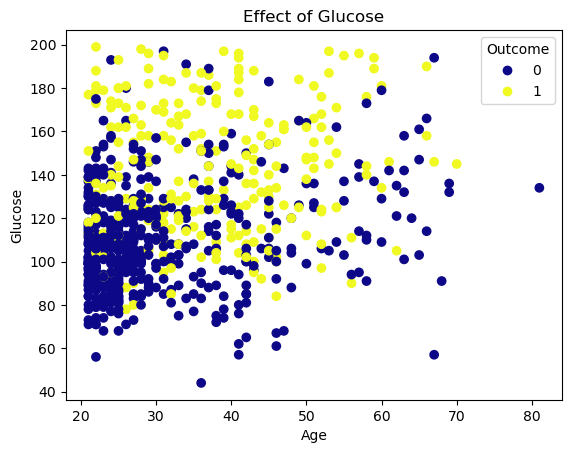

In [20]:
fig , ax = plt.subplots()
scatter = ax.scatter(x=df['Age'],y=df['Glucose'],
                    c=df['Outcome'], cmap='plasma')
ax.set(title="Effect of Glucose",xlabel='Age',ylabel="Glucose")
ax.legend(*scatter.legend_elements(),title='Outcome')
plt.show()

In [21]:
### corelation heatmap
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138538,0.212596,0.018864,0.016344,-0.032819,0.561819,0.228912
Glucose,0.138538,1.000000,0.224792,0.146864,0.211747,0.134032,0.258065,0.485485
BloodPressure,0.212596,0.224792,1.000000,0.141275,0.257036,-0.004801,0.331079,0.169682
SkinThickness,0.018864,0.146864,0.141275,1.000000,0.553105,0.148302,0.001502,0.180732
BMI,0.016344,0.211747,0.257036,0.553105,1.000000,0.121304,0.002109,0.286521
DiabetesPedigreeFunction,-0.032819,0.134032,-0.004801,0.148302,0.121304,1.000000,0.016213,0.176399
Age,0.561819,0.258065,0.331079,0.001502,0.002109,0.016213,1.000000,0.241827
Outcome,0.228912,0.485485,0.169682,0.180732,0.286521,0.176399,0.241827,1.000000


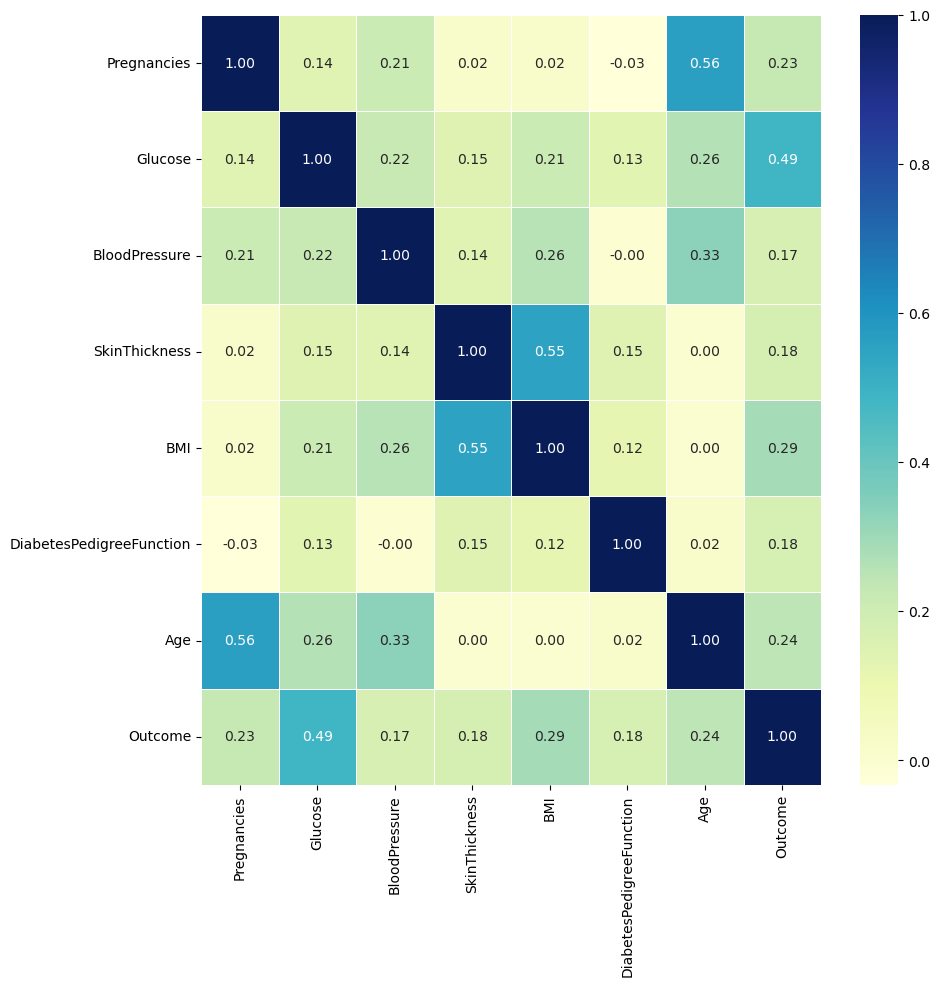

In [22]:
corr_map = df.corr()

fig , ax = plt.subplots(figsize= (10,10))
ax = sns.heatmap(corr_map, annot=True, linewidths= 0.5,fmt= "0.2f",cmap="YlGnBu")
plt.show()

In [23]:
df.shape

(727, 8)

In [24]:
for column in correlation.columns:
    if (correlation[column] <= 0).sum() != 0:
        print(column,(correlation[column] <= 0).sum())

Pregnancies 1
BloodPressure 1
DiabetesPedigreeFunction 2


### Chicking and Removing Outliers

In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

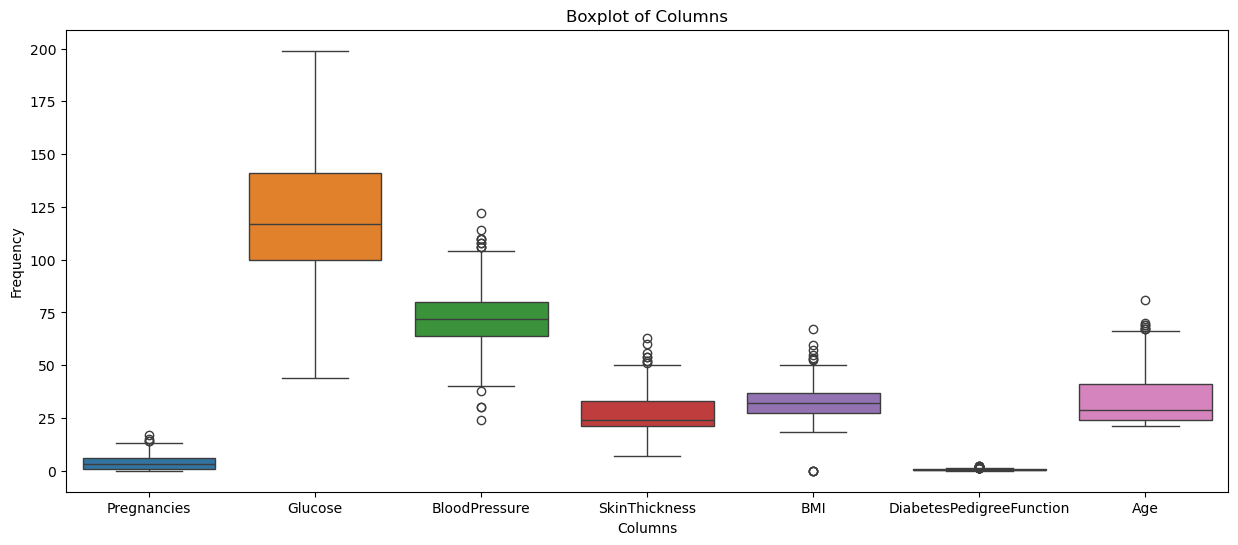

In [26]:
fig , ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']],ax=ax)
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Frequency")
plt.show()

In [27]:
def removing_outlier(df,columns):
    for col in columns:
        Q3 = df[col].quantile(0.75)
        Q1 = df[col].quantile(0.25)
        IQR = Q3 -Q1
        upper = Q3 + (1.5*IQR)
        lower = Q1 - (1.5*IQR)
        df = df[(df[col]<=upper)& (df[col]>=lower)]
    return df

In [28]:
columns = ['Pregnancies','BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']
df_clean= removing_outlier(df,columns)

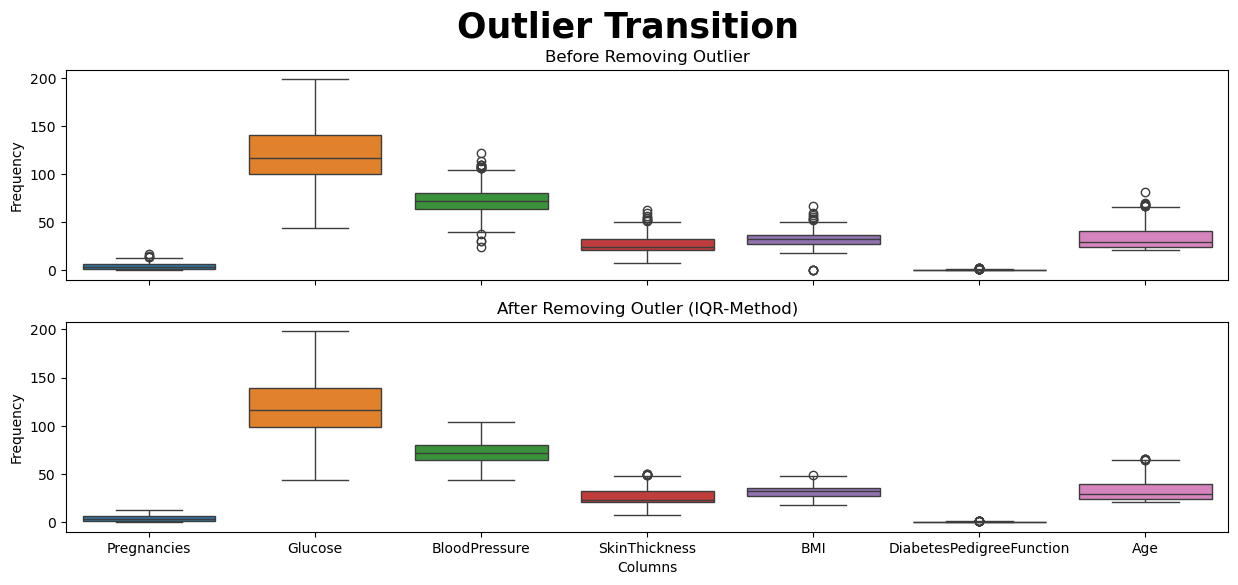

In [29]:
fig ,ax = plt.subplots(nrows=2 ,ncols=1,figsize = (15,6),sharex=True )
fig.suptitle("Outlier Transition",fontsize=25,fontweight='bold')

# Plot 1 Before Removing Outliers
sns.boxplot(data=df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']],ax=ax[0])
ax[0].set(title='Before Removing Outlier',ylabel='Frequency')

# Plot 2 After Removing Outliers
sns.boxplot(data=df_clean.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']],ax=ax[1])
ax[1].set(title='After Removing Outler (IQR-Method)',xlabel="Columns",ylabel="Frequency")

plt.show()

### Discription:
The above figure <b>shows the Outlier Transition Before and After</b> , the <b>Outlier are removed usng IQR-Method</b> and the outlier are minimized

In [32]:
print(f"Shape of df : {df.shape}")
print(f"Shape of df_clean : {df_clean.shape}")
print(f"Number of samples Removed: {df.shape[0]-df_clean.shape[0]}")

Shape of df : (727, 8)
Shape of df_clean : (658, 8)
Number of samples Removed: 69


## Applying Machine learning Model on the data set

In [37]:
df_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [117]:
X = df_clean.drop("Age",axis=1)
Y = df_clean["Age"]

X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.25, random_state=30)

print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   493
Size of Train Y =   493
Size of Test X =   165
Size of Test Y =   165


# <u>SVM REGRESSOR</u>

## Training

In [118]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_TRAIN,Y_TRAIN)

SVR(kernel='linear')

In [119]:
# accuracy for prediction on training data
training_data_prediction = svr.predict(X_TRAIN)
print(training_data_prediction)

[41.55060201 45.26407586 44.40465763 34.20051186 31.43406615 29.20549311
 19.56932545 30.76107166 36.50978544 38.20913213 21.87325289 38.02807561
 36.87074901 35.96389085 23.25816371 32.06968823 25.13274396 31.49888145
 23.64546492 42.28713115 24.13605963 24.94877781 26.53525233 23.38131546
 44.63689638 24.33100683 33.47849184 21.22136997 31.83971415 39.66986837
 25.73720975 24.77030241 24.41407627 49.39314947 37.03270561 41.50786151
 27.13370248 23.46730723 27.85065872 25.41073684 20.72254054 25.11539733
 26.10646856 43.53526419 38.69806877 25.12720527 29.56763546 29.88633985
 37.00739324 23.93249458 32.20790921 23.78001516 24.07332985 50.65369319
 34.13422332 40.0982111  32.2444624  29.85924606 31.64136452 36.45262054
 29.6550867  32.59816917 41.64003119 24.93144639 23.51476498 26.39010716
 34.99158519 44.98160925 33.56490784 23.19481106 46.60727226 23.11966746
 35.89868232 26.01119982 30.95423595 26.21173236 26.49370425 31.04886408
 38.39355378 30.51665757 22.0451468  36.31591271 21

In [120]:
# r2 squared error (r2 score)
score_1 = r2_score(Y_TRAIN,training_data_prediction)

# Mean absolute Error
score_2 = mean_absolute_error(Y_TRAIN, training_data_prediction)

print("R2 Score            :", score_1)
print("Mean Absolute Error :", score_2)

R2 Score            : 0.34273535249020837
Mean Absolute Error : 5.98541299028365


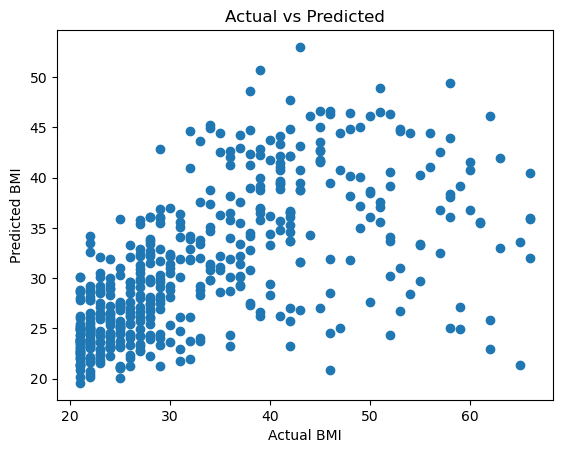

In [121]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted")
plt.show()

## Testing

In [122]:
# accuracy for prediction on training data
testing_data_prediction = svr.predict(X_TEST)
print(testing_data_prediction)

[23.85042236 40.43383996 37.58724064 22.20913397 25.63611286 32.73521655
 37.7213548  28.40110586 33.16327756 22.87049997 37.9414912  36.76385214
 31.47799618 36.32313085 24.36842394 22.30977037 32.26241107 23.19548291
 23.39300624 37.09204878 27.95885609 39.94954522 30.3714189  32.91461591
 25.79828823 23.27877588 30.67593989 18.38137793 20.35667255 23.67724153
 23.36618491 41.5261156  38.11759834 32.05529562 28.23039419 22.47063645
 31.26062783 26.69677346 24.24200859 24.05345952 39.21323019 22.74875765
 24.9743443  30.8462348  34.72199826 37.29021653 24.16691323 22.08551876
 22.31273734 28.93744285 21.13090688 21.06887552 25.25739454 23.28454227
 29.44512349 31.19940548 21.2768029  36.39445508 23.82508273 47.63969802
 44.97608879 30.52504604 30.48948293 29.34430677 24.79360095 34.83595876
 21.21448654 27.72874978 24.42562565 32.2927923  24.11275132 21.47103943
 38.77264239 31.27327362 34.32847651 48.08803533 23.96934192 31.131432
 32.12053491 41.11586303 39.67693129 41.49886494 43.0

In [123]:
# R squared (r2 score)
score_1 = r2_score(Y_TEST, testing_data_prediction)

# Mean Absolute Error
score_2 = mean_absolute_error(Y_TEST, testing_data_prediction)

print("R2 Score            : ", score_1)
print("Mean Absolute Error : ", score_1)

R2 Score            :  0.37763281099391843
Mean Absolute Error :  0.37763281099391843


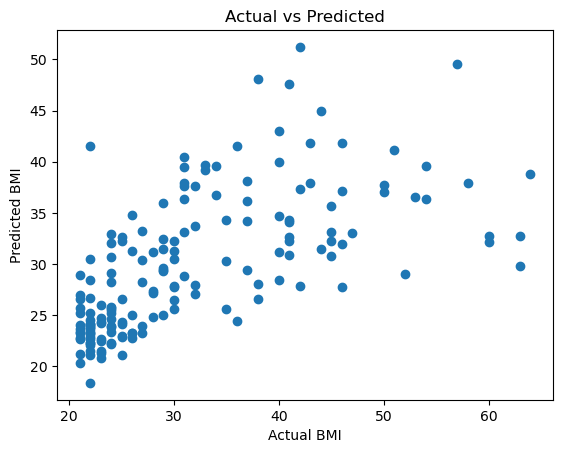

In [124]:
plt.scatter(Y_TEST,testing_data_prediction)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted")
plt.show()

# <u> Random Forest Regressor </u>

# Training

In [125]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, random_state=25)
# train the classifier
regressor.fit(X_TRAIN, Y_TRAIN)

RandomForestRegressor(n_estimators=5, random_state=25)

In [126]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[43.  41.4 44.8 22.8 36.6 37.6 22.  35.  36.  40.8 29.8 52.6 42.6 32.6
 27.2 27.8 22.4 37.2 23.  39.2 30.6 22.8 24.  22.6 34.  22.  24.2 25.8
 44.8 38.2 32.8 31.  25.4 58.  51.2 55.2 23.8 23.6 28.6 21.8 22.6 22.2
 28.4 44.2 49.4 28.6 25.8 33.  46.8 21.  29.  22.2 25.  41.2 37.4 47.4
 35.  28.2 43.  38.6 27.6 23.6 45.4 26.  29.6 23.4 39.2 41.8 52.  36.6
 42.4 25.2 28.8 27.2 27.6 35.6 24.2 28.6 47.4 32.4 21.8 33.4 21.8 26.6
 23.  58.  30.  21.4 36.4 31.4 30.6 40.6 22.2 26.2 25.8 53.  32.  21.8
 34.  30.2 41.6 38.4 43.8 43.8 23.8 31.6 23.6 47.8 22.4 29.6 29.  26.
 26.  31.  32.4 40.8 25.2 27.  31.  42.4 44.4 26.  22.6 24.4 23.4 42.2
 24.4 37.2 50.2 44.  21.6 22.2 40.2 22.2 24.  24.8 29.  46.  50.6 58.
 24.2 34.6 27.  36.6 40.4 29.  25.2 51.4 37.4 30.8 53.6 29.6 22.2 45.8
 27.4 24.6 44.6 45.8 40.2 59.  35.  39.2 38.4 22.8 32.  59.  40.  40.2
 27.  27.4 25.  36.8 22.  22.2 23.2 33.  27.6 41.6 35.6 38.2 23.  21.8
 38.4 41.6 46.2 39.2 23.2 21.6 24.8 48.  21.  38.2 27.  22.8 26.8 39.4
 28.6 42

In [127]:
# R squared Error (r2 score)
score_1 = r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.8434416320641748
Mean Absolute Error =  2.9217038539553752


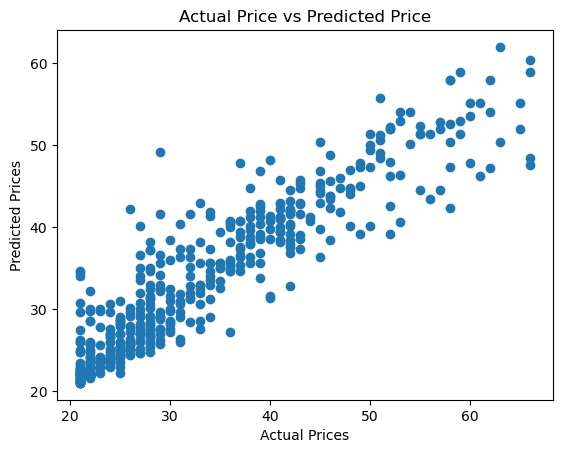

In [128]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Testing

In [129]:
y_pred = regressor.predict(X_TEST)
y_pred

array([22. , 52. , 43. , 24. , 24.4, 28.4, 42.6, 29.8, 38.4, 30. , 40.4,
       41.6, 31.2, 45. , 25.8, 23.6, 26. , 24.6, 23.8, 31.8, 30.4, 52.8,
       25.6, 30.4, 50.6, 21.6, 33. , 25. , 25. , 29.4, 29. , 40.6, 51.8,
       29.4, 39.8, 29.8, 29.6, 42.8, 31. , 37. , 38.8, 22.8, 24.2, 33.6,
       38. , 42. , 37.4, 22.6, 22.8, 40.2, 21.6, 26.4, 24.2, 23.6, 30. ,
       28.4, 23.6, 55. , 26. , 45.6, 40. , 48.2, 30. , 25. , 39.2, 42.4,
       24.4, 34. , 40.8, 31.2, 24.6, 23. , 52. , 29. , 42.2, 39.2, 33.6,
       31.4, 39.2, 40.2, 37.2, 53.2, 42.4, 25.6, 40. , 27.2, 43. , 28.2,
       27.2, 25. , 29.4, 28. , 31.6, 52.8, 28.6, 36. , 46.6, 24.2, 27.8,
       24.4, 39.2, 52.4, 26.2, 33.4, 27.8, 24.8, 22.8, 33.8, 34.2, 62. ,
       33.6, 40.2, 33. , 34.8, 31.6, 30.4, 33.4, 37.6, 23.8, 36.4, 22.8,
       36. , 25.4, 32.2, 34.6, 25.8, 22.4, 26.8, 25. , 46.4, 39.4, 41.8,
       47.6, 24.2, 27.8, 39.8, 49.4, 24.6, 28.8, 39.4, 31.8, 49. , 25. ,
       27.6, 44.2, 39.4, 51.8, 33. , 30.2, 25. , 42

In [130]:
# R squared Error (r2 score)
score_1 = r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  -0.030505770946217092
Mean Absolute Error =  7.848484848484849


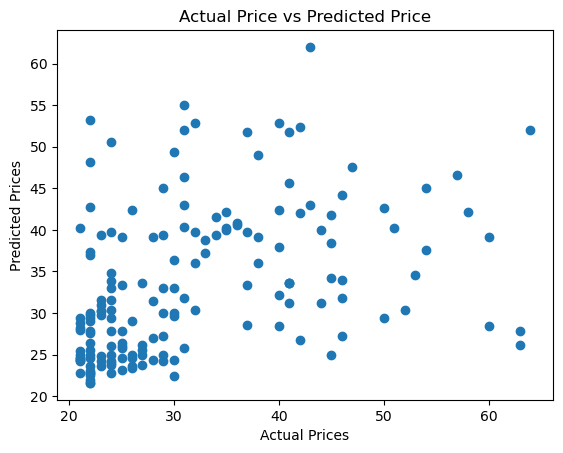

In [131]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# <u>Regression Decision Tree</u>

In [137]:
from sklearn.tree import DecisionTreeRegressor 

# create regressor object
regressor = DecisionTreeRegressor(random_state=25)

# fit regressor 
regressor.fit(X_TRAIN, Y_TRAIN)

DecisionTreeRegressor(random_state=25)

In [138]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[45. 34. 47. 22. 37. 37. 21. 35. 36. 36. 22. 58. 39. 29. 36. 23. 22. 28.
 23. 39. 24. 22. 24. 21. 32. 22. 22. 29. 48. 41. 42. 31. 25. 58. 51. 60.
 23. 22. 22. 22. 22. 21. 32. 45. 50. 25. 26. 29. 39. 21. 28. 22. 26. 39.
 31. 49. 35. 28. 43. 39. 29. 22. 45. 22. 21. 23. 49. 34. 65. 27. 46. 24.
 25. 28. 30. 39. 23. 25. 58. 30. 22. 35. 22. 24. 23. 58. 23. 21. 45. 40.
 28. 53. 21. 21. 22. 53. 32. 22. 27. 26. 42. 30. 46. 46. 23. 28. 25. 37.
 21. 24. 29. 26. 21. 30. 28. 40. 25. 24. 25. 58. 45. 24. 21. 26. 22. 42.
 25. 28. 54. 48. 22. 21. 42. 21. 24. 28. 27. 47. 51. 62. 25. 37. 27. 29.
 39. 34. 27. 50. 37. 27. 60. 29. 22. 41. 29. 27. 55. 43. 48. 66. 28. 52.
 42. 21. 27. 59. 41. 27. 25. 27. 25. 39. 22. 22. 21. 28. 29. 32. 34. 36.
 22. 22. 46. 29. 61. 42. 24. 21. 21. 52. 21. 28. 27. 22. 24. 37. 33. 38.
 41. 50. 26. 22. 38. 43. 32. 37. 60. 21. 34. 23. 29. 38. 43. 25. 28. 56.
 38. 43. 26. 29. 25. 28. 47. 21. 23. 21. 24. 23. 22. 32. 37. 21. 27. 24.
 52. 31. 53. 25. 62. 21. 21. 28. 52. 42. 34. 41. 24

In [140]:
# R squared Error (r2 score)
score_1 = r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  1.0
Mean Absolute Error =  0.0


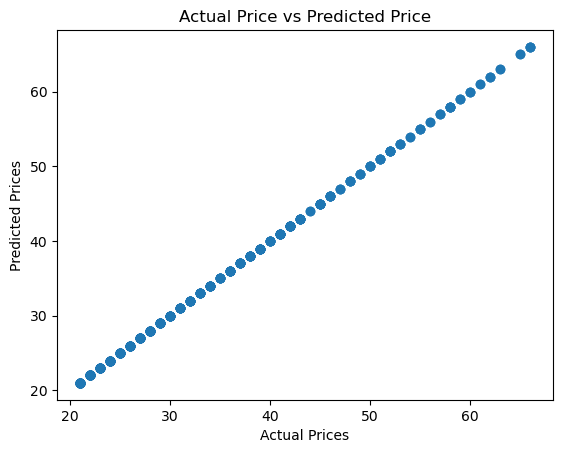

In [141]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Testing

In [142]:
y_pred = regressor.predict(X_TEST)
y_pred

array([22., 43., 50., 22., 24., 34., 36., 35., 48., 23., 29., 37., 27.,
       48., 23., 29., 23., 23., 22., 25., 27., 48., 22., 27., 42., 24.,
       28., 22., 22., 28., 25., 58., 48., 27., 31., 21., 32., 21., 21.,
       42., 34., 28., 46., 22., 27., 51., 24., 21., 21., 23., 22., 24.,
       21., 22., 25., 30., 21., 48., 24., 51., 56., 61., 29., 42., 35.,
       40., 25., 46., 21., 28., 22., 25., 47., 24., 52., 36., 29., 31.,
       40., 32., 39., 51., 44., 42., 23., 32., 44., 28., 34., 29., 27.,
       24., 21., 62., 22., 43., 62., 24., 40., 21., 36., 45., 27., 27.,
       22., 24., 22., 24., 40., 48., 30., 54., 37., 26., 30., 34., 21.,
       46., 24., 30., 24., 40., 24., 24., 51., 24., 21., 28., 23., 58.,
       38., 51., 36., 24., 37., 39., 29., 26., 30., 37., 52., 26., 29.,
       24., 43., 42., 59., 24., 24., 28., 34., 22., 40., 27., 21., 27.,
       31., 27., 23., 23., 30., 25., 24., 48., 24.])

In [144]:
# R squared Error (r2 score)
score_1 = r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  -0.1598618322900316
Mean Absolute Error =  8.018181818181818


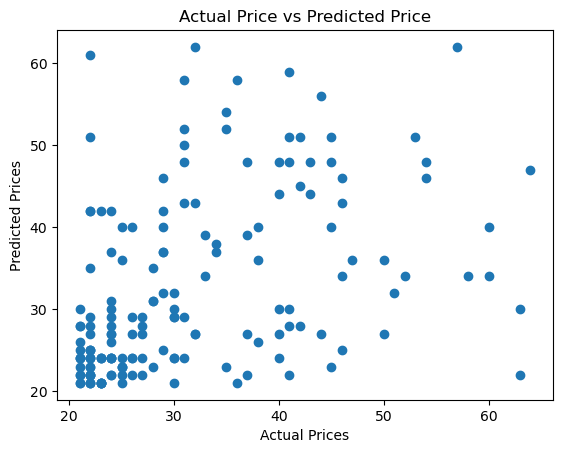

In [145]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

<b>While watching the above results <u>this data set is not perfect for regression problem</u> , so we will stop after viewing the above results ,the model overfits on this data set.</b>